In [91]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import os
import numpy as np
from os.path import join as oj
import matplotlib.pyplot as plt
import vae
plt.style.use('dark_background')
def to_im(x):
    return x.cpu().detach().numpy().reshape((28, 28))

# load the model

In [6]:
net = vae.VAE()
net.load_state_dict(torch.load('weights/vae_epoch_25.pth'))

<All keys matched successfully>

# see if we can reconstruct an image

In [94]:
im0 = datasets.MNIST(root='data', train=True).data[0].float()
im1 = datasets.MNIST(root='data', train=True).data[1].float()
im2 = datasets.MNIST(root='data', train=True).data[2].float()
im0_reconstructed = to_im(net(im0)[0])

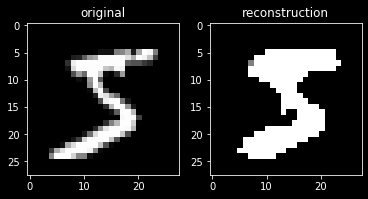

In [92]:
plt.subplot(1, 2, 1)
plt.imshow(im0, cmap='gray')
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(im0_reconstructed, cmap='gray')
plt.title('reconstruction')
plt.show()

# analyze the latent space

In [103]:
(mu0, logvar0) = net.encode(im0.reshape(-1, 784))
(mu1, logvar1) = net.encode(im1.reshape(-1, 784))
(mu2, logvar2) = net.encode(im2.reshape(-1, 784))

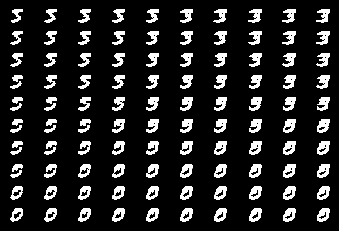

In [107]:
R, C = 10, 10
i = 0
for r, w1 in enumerate(np.linspace(0, 1, 10)):
    for c, w2 in enumerate(np.linspace(0, 1, 10)):
        plt.subplot(R, C, i + 1)
        plt.imshow(to_im(net.decode(mu0 + w1 * mu1 + w2 * mu2)), cmap='gray')
        plt.axis('off')
        i += 1
plt.show()